In [1]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


In [4]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


2
鳥


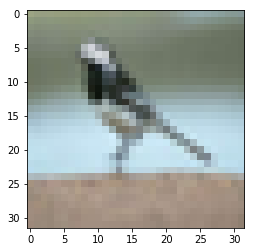

In [6]:
labels = ["飛機", "汽車", "鳥", "貓", "鹿",
          "狗", "青蛙", "馬", "船", "卡車"]
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 49999)
print(y_train[c][0])
print(labels[y_train[c][0]])
plt.imshow(x_train[c])

In [7]:
x_train_shape = x_train / 255
x_test_shape = x_test / 255
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense,Flatten, Dropout
'''
Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, 
       use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, 
       bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
       
p.s. When using this layer as the first layer in a model, 
     provide an input_shape argument (tuple of integers or None, does not include the batch axis), e.g. input_shape=(10, 128)
'''
'''
MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)
'''
cnn = Sequential()
cnn.add(Conv2D(32, (3,3), activation='relu',padding='same', input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
__________

In [10]:
'''
Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', 
      kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, 
      bias_constraint=None)
'''
cnn.add(Dense(256, activation='relu'))
cnn.add(Dense(10, activation='softmax'))
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
cnn.fit(x_train_shape, y_train_cat, batch_size=200, epochs=10, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 67s 1ms/step - loss: 1.6702 - acc: 0.3893 - val_loss: 1.4110 - val_acc: 0.5030
Epoch 2/10
45000/45000 [==============================] - 65s 1ms/step - loss: 1.2921 - acc: 0.5404 - val_loss: 1.1689 - val_acc: 0.5864
Epoch 3/10
45000/45000 [==============================] - 64s 1ms/step - loss: 1.1140 - acc: 0.6071 - val_loss: 1.0025 - val_acc: 0.6484
Epoch 4/10
45000/45000 [==============================] - 65s 1ms/step - loss: 1.0057 - acc: 0.6439 - val_loss: 0.9430 - val_acc: 0.6764
Epoch 5/10
45000/45000 [==============================] - 65s 1ms/step - loss: 0.9166 - acc: 0.6781 - val_loss: 0.9577 - val_acc: 0.6646
Epoch 6/10
45000/45000 [==============================] - 64s 1ms/step - loss: 0.8600 - acc: 0.6993 - val_loss: 0.8522 - val_acc: 0.7042
Epoch 7/10
45000/45000 [==============================] - 65s 1ms/step - loss: 0.8003 - acc: 0.7203 - val_loss: 0.8073 - val_acc:

In [12]:
cnn.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 5s 524us/step


[0.7608071090698242, 0.7349]